## Imports and Setup

In [1]:
import os 
os.chdir('../')
import yaml
import geopandas as gpd
from utils import data_annotator

%load_ext autoreload
%autoreload 2

## Parameters

In [10]:
iso_code = "LCA"
mode = "streetview"
path_to_images = f"data/streetview/{iso_code}/images/"
path_to_file = f"data/streetview/{iso_code}/data.csv"

In [329]:
iso_code = "VCT"
mode = "aerial"
path_to_images = f"data/aerial/raster/{iso_code}/tiles_{iso_code}/"
path_to_file = f"data/aerial/vector/{iso_code}/tiles_{iso_code}.geojson"
path_to_embeddings = f"data/aerial/vector/{iso_code}/embeddings/"

In [3]:
config_file = f"configs/config_{mode}.yaml"
with open(config_file, 'r') as stream:
    labels = yaml.safe_load(stream)

## Interactive Annotation

In [471]:
da = data_annotator.DataAnnotator(path_to_images, path_to_file, path_to_embeddings, labels, mode=mode, index=1204) 
da.widget

MulticlassLabeller(children=(HTML(value='<h2 style="text-align:center;">20391_99.tif <br> Index: 1204</h2><h3 …

In [ ]:
da.end_timer()

## Visualize Annotations

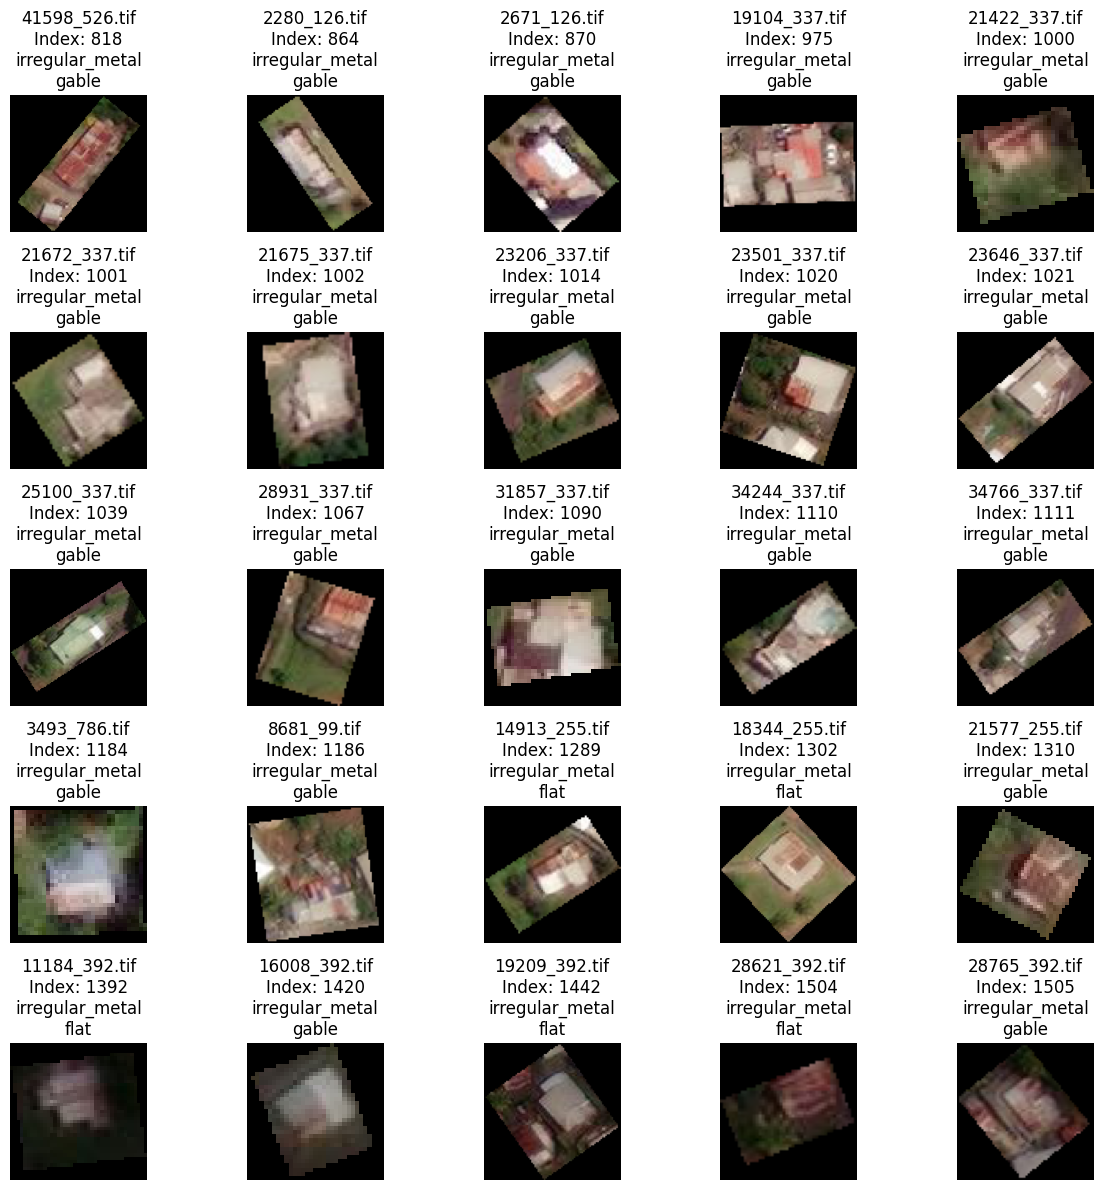

In [468]:
#da.visualize_annotations(index=0)

# To show only hipped buildings, uncomment the following:
#da.visualize_annotations(index=50, query="roof_material == 'nan'")
da.visualize_annotations(index=50, query="roof_material == 'irregular_metal'")
#da.visualize_annotations(index=50, query="clean == False")

## Vector Search

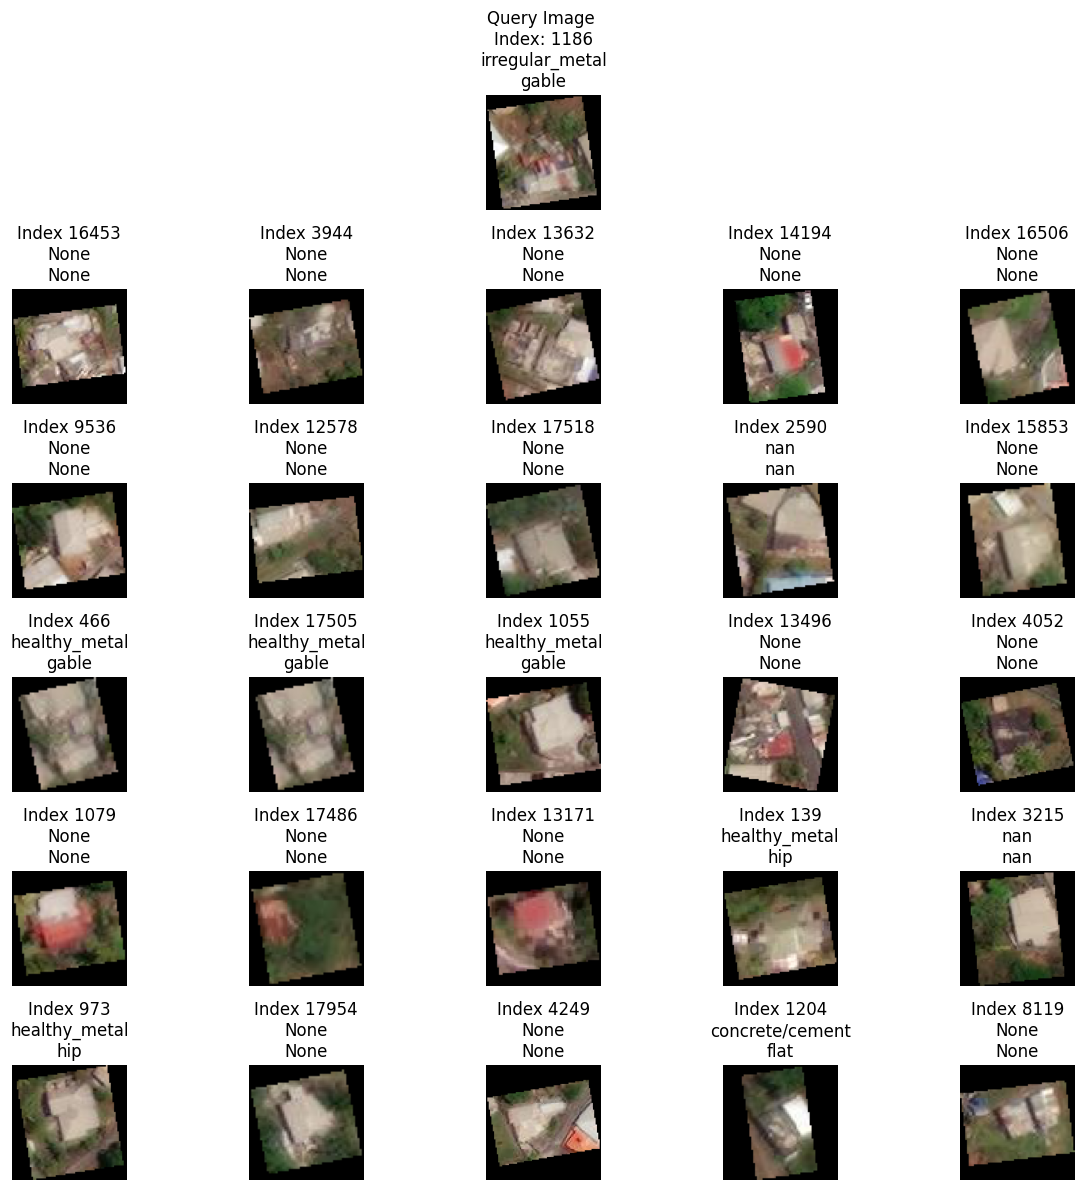

GridspecLayout(children=(Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x00M\x00\x00\x00M\x08\x02\x…

In [469]:
da.vector_search(query_index=1186, n=25, exclude_annotated=True)

## Show raw data

In [470]:
data = da.load_data().dropna()
print(f"Total annotated: {data[(data.annotated == True) & (data.clean == True)].shape[0]}")
for label in labels:
    print(data[label].value_counts())
data.head(3)

Total annotated: 0
roof_material
healthy_metal      2381
nan                 415
concrete/cement     323
irregular_metal     252
tile                127
incomplete           58
Name: count, dtype: int64
roof_pitch
gable      1737
hip         965
nan         415
flat        387
no_roof      52
Name: count, dtype: int64


,UID,ghsl_smod,rurban,grid_id,filename,annotated,roof_material,roof_pitch,clean,filepath,geometry
0,5,13,rural,238,5_238.tif,1.0,healthy_metal,gable,True,C:\Users\Isabelle\Documents\GFDRR\dep\caribbea...,"POLYGON ((-61.2389 13.28349, -61.2389 13.28358..."
2,120,13,rural,238,120_238.tif,1.0,healthy_metal,gable,True,C:\Users\Isabelle\Documents\GFDRR\dep\caribbea...,"POLYGON ((-61.2372 13.28367, -61.23717 13.2835..."
3,151,13,rural,238,151_238.tif,1.0,irregular_metal,gable,True,C:\Users\Isabelle\Documents\GFDRR\dep\caribbea...,"POLYGON ((-61.23815 13.28359, -61.23812 13.283..."
